# Mathematical Primer and Quantum Gates

## Vector
1. All qubits are in $\mathbb{C}^2$
2. The Eulidean Norm of all qubits is 1 (need to normalize by devide co-efficient by Length)

In [2]:
import numpy as np
from qiskit import *

In [3]:
a = 2 + 1j
b = 4 + 3j

In [4]:
x = np.array([a, b])

In [5]:
def norm(vector):
    def coeffLength(coeff):
        return np.real(coeff*np.conj(coeff))
    def totalLength():
        sum = 0
        for i in vector:
            sum += coeffLength(i)
        return sum**(0.5) 
    totalSum = np.array(totalLength())
    return vector/totalSum

In [6]:
norm(x)

array([0.36514837+0.18257419j, 0.73029674+0.54772256j])

In [7]:
norm([1+1j, 1-1j])

array([0.5+0.5j, 0.5-0.5j])

### Inner and Outer product

In [8]:
x = np.array([1+1j, 1-1j])
y = np.array([1+2j, 1-2j])

In [9]:
def inner(A,B):
    return A*np.matrix(B).getH()

In [10]:
print(x,y)
inner(x,y)
inner(y,x)

[1.+1.j 1.-1.j] [1.+2.j 1.-2.j]


matrix([[6.+0.j]])

In [11]:
def outer(A, B):
    return np.outer(A,B)

In [12]:
outer(x,y)

array([[-1.+3.j,  3.-1.j],
       [ 3.+1.j, -1.-3.j]])

In [13]:
outer(y,x)

array([[-1.+3.j,  3.+1.j],
       [ 3.-1.j, -1.-3.j]])

### Linear Independent, Orthogonality

In [14]:
def isLinIndep(M):
    return (M.shape[1] == np.linalg.matrix_rank(M))

In [15]:
matrix = np.array(
    [
        [1, 1, 5, 20],
        [3, 0, 4, 15],
        [4, 1, 9, 36],
        [1, 7, 0, 0]
    ])

In [16]:
isLinIndep(matrix)

True

In [17]:
def isOrthogonal(A, B):
    return inner(A, B) == 0

In [18]:
vectorA = np.array([1, 0])
vectorB = np.array([0, 1])

In [19]:
isOrthogonal(vectorA, vectorB)

matrix([[ True]])

### Unitary, Kroneckor (tensor) product

In [20]:
def isUnitary(M):
    return np.allclose(np.eye(np.shape(M)[0]), np.matrix(M).getH()*M)

In [21]:
M = np.array(
    [
        [1, 0],
        [0, 1]
    ])

In [22]:
isUnitary(M)

True

In [23]:
def tensordot(A, B):
    return np.kron(A, B)

In [24]:
tensordot(M, M)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

## Quantum Gates

In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import Aer, execute, visualization, assemble

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
# circuit.y(qreg_q[2])
# circuit.z(qreg_q[3])

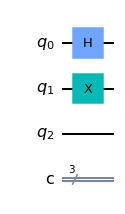

In [26]:
circuit.draw('mpl')

In [27]:
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend).result()
output = result.get_statevector(circuit, decimals=3)

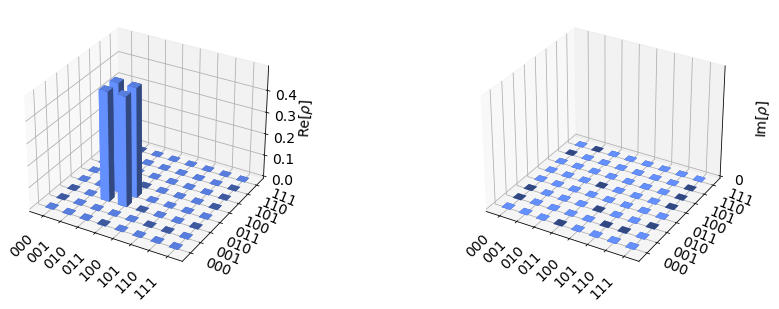

In [28]:
visualization.plot_state_city(output)

from qiskit import assemble

In [29]:
circ = QuantumCircuit(6)

In [30]:
circ.h(1)
circ.x(2)
circ.y(3)
circ.x(4)
circ.z(4)
circ.h(5)
circ.rz(pi/4, 5)

In [31]:
circ.draw();

In [32]:
qobj = assemble(circ)
state = backend.run(qobj).result().get_statevector()

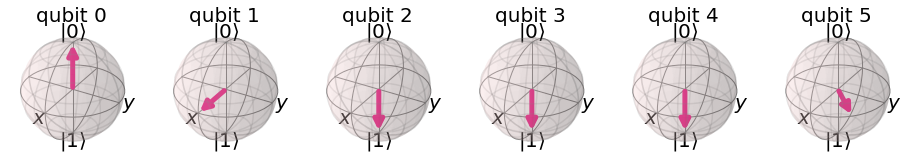

In [33]:
visualization.plot_bloch_multivector(state)

### Random Number Generator

In [34]:
circ3 = QuantumCircuit(6,6)

In [35]:
for i in range(6):
    circ3.h(i)
    circ3.measure(i,i)

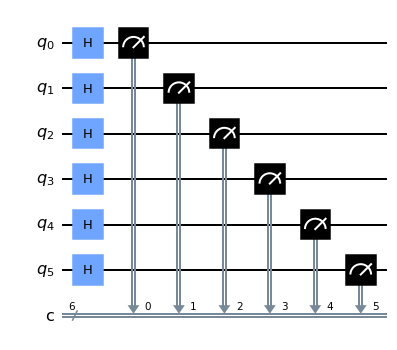

In [36]:
circ3.draw()

In [37]:
measure = []
for j in range(10):
    outcome = execute(circ3, backend).result()
    hist = outcome.get_counts()
    for i in hist.keys():
        measure.append(int(i,2))

print(measure)

[27, 58, 31, 53, 5, 63, 34, 50, 55, 1]


### Eigenvalue, eigenvector

In [38]:
M = np.array(
    [
        [47, 13, -34],
        [41, 4, 0],
        [28, 58, 41],
    ])

In [39]:
def get_eigenvalues(M):
    return np.linalg.eigvals(M)

def get_eigenvectors(M):
    eigvals, eigvec = np.linalg.eig(M)
    return eigvec

In [40]:
get_eigenvalues(M)

array([ 55.4901018+41.53643536j,  55.4901018-41.53643536j,
       -18.9802036 +0.j        ])

In [41]:
# get_eigenvectors(M)
eigenvector = get_eigenvectors(M)
eigenvector[:,2].reshape(3,1)

array([[ 0.4164211 +0.j],
       [-0.74295535+0.j],
       [ 0.52403322+0.j]])

### Projection

In [42]:
from math import sqrt

In [43]:
V = np.array(
    [
        [1,1],
    ])

In [44]:
V

array([[1, 1]])

In [45]:
axes = []
axes.append(np.array(
    [
        [1, 0],
    ]))
axes.append(np.array(
    [
        [0, 1],
    ]))

In [46]:
def proj(V, axis):
    return np.dot(V, np.dot(outer(axis, axis), np.transpose(V)))

In [47]:
proj(V, axes[1])

array([[1]])

In [48]:
def length(V, axes):
    length = 0
    for i in axes:
        length += proj(V, i)
    return sqrt(length)

In [49]:
length(V, axes)

1.4142135623730951

In [50]:
V4 = np.array(
    [
        [1/sqrt(2),1/sqrt(2), 1/sqrt(2),1/sqrt(2)],
    ])

In [51]:
axes4 = []
axes4.append(np.array(
    [
        [1, 0, 0, 0],
    ]))
axes4.append(np.array(
    [
        [0, 1, 0, 0],
    ]))
axes4.append(np.array(
    [
        [0, 0, 1, 0],
    ]))
axes4.append(np.array(
    [
        [0, 0, 0, 1],
    ]))

In [52]:
proj(V4,axes4[3])

array([[0.5]])

In [53]:
length(V4, axes4)

1.414213562373095

### Bell States

In [54]:
circB = QuantumCircuit(2,2)
circB.x(1)
circB.h(0)
circB.cx(0,1)
circB.measure([0,1],[0,1])

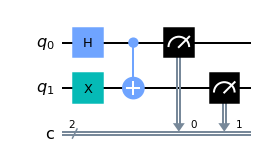

In [55]:
circB.draw('mpl')

In [56]:
measure = []
for j in range(10):
    outcome = execute(circB, backend).result()
    hist = outcome.get_counts()
    for i in hist.keys():
        measure.append(i)

print(measure)
# The result only have 00 and 11

['01', '01', '01', '10', '01', '10', '01', '01', '10', '10']


### Density matrix

In [57]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

In [58]:
# init state 10
qc.initialize([0, 0, 1, 0], qr)

In [59]:
qc.h(0)
qc.cx(0,1)

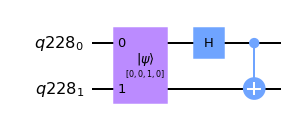

In [62]:
qc.draw()

In [63]:
# Bell state
state = execute(qc, backend).result().get_statevector()
state

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [70]:
from qiskit import quantum_info

In [71]:
def getDensity(quantumCircuit):
    return np.matrix(quantum_info.DensityMatrix(execute(quantumCircuit, backend).result().get_statevector()).data)

In [72]:
getDensity(qc)

matrix([[0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
        [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
        [0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]])

### Partial Trace and components of the Bloch vector

In [73]:
quantum_info.partial_trace(state, [0])

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [74]:
def getPTrace(quantumCircuit, n):
    return quantum_info.partial_trace(execute(quantumCircuit, backend).result().get_statevector(), [n])

In [75]:
getPTrace(qc, 1)

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [76]:
qc2 = QuantumCircuit(2)
qc2.h(1)
qc2.draw();

In [77]:
getPTrace(qc2, 0)

DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,))


In [78]:
getPTrace(qc2, 1)

DensityMatrix([[1.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j]],
              dims=(2,))


In [79]:
def getRx(pd):
    sigmaX = np.matrix([[0, 1], [1,0]])
    return np.trace(pd.data*sigmaX)

def getRy(pd):
    sigmaY = np.matrix([[0, -1j], [1j,0]])
    return np.trace(pd.data*sigmaY)

def getRz(pd):
    sigmaZ = np.matrix([[1, 0], [0,-1]])
    return np.trace(pd.data*sigmaZ)

In [80]:
getRx(getPTrace(qc2,0))

(1+0j)

In [81]:
getRy(getPTrace(qc2,0))

0j

In [82]:
getRz(getPTrace(qc2,0))

(2.220446049250313e-16+0j)

### Toffoli - SWAP - Phase shift gates

In [83]:
qr = QuantumRegister(7, "q")
cr = ClassicalRegister(7)
qc = QuantumCircuit(qr, cr)
initialState = [0 for i in range(0, 2**7)]
# Set init state = 107 (10) = 1101011 (2)
initialState[107] = 1
qc.initialize(initialState, qr)

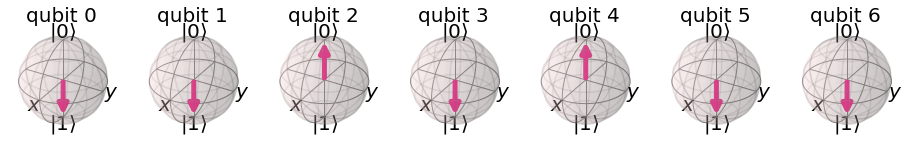

In [85]:
visualization.plot_bloch_multivector(execute(qc, backend).result().get_statevector())

In [86]:
qc.ccx(0, 1, 2)
qc.swap(3,4)
qc.h(6)
qc.cp(pi/3, 5, 6)

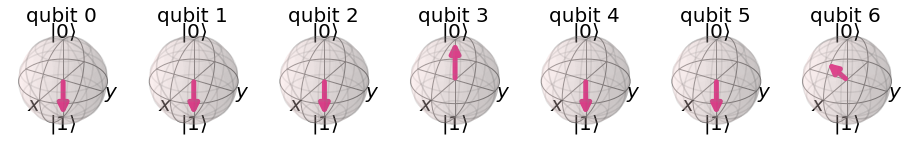

In [89]:
visualization.plot_bloch_multivector(execute(qc, backend).result().get_statevector())

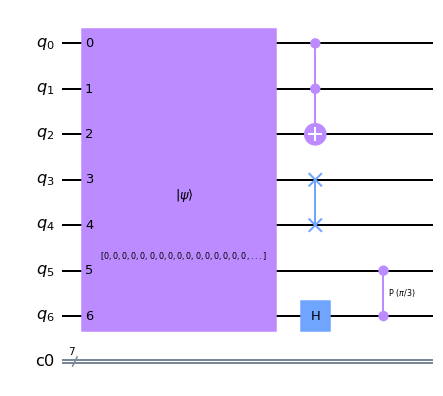

In [88]:
qc.draw()

### Fredkin gate (CSWAP gate)

In [192]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)
initialState = [0 for i in range(0, 2**3)]
initialState[5] = 1
# init state = 5 (q2q1q0 = 101)
# initialState[4] = 1/sqrt(2)
qc.initialize(initialState, qr)

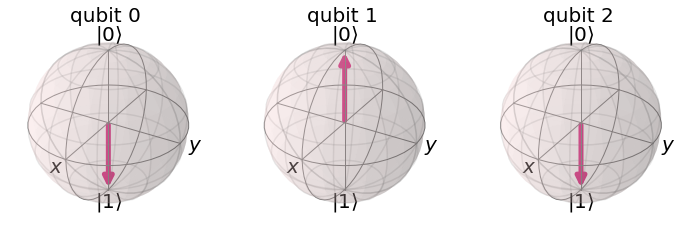

In [193]:
visualization.plot_bloch_multivector(execute(qc, backend).result().get_statevector());

In [197]:
# Option 1: Using cswap gate
# qc.cswap(0,1,2)

# Option 2: Build from scratch
qc.cx(2,1)
qc.ccx(0,1,2)
qc.cx(2,1)
# or
# qc.cx(1,2)
# qc.ccx(0,2,1)
# qc.cx(1,2)

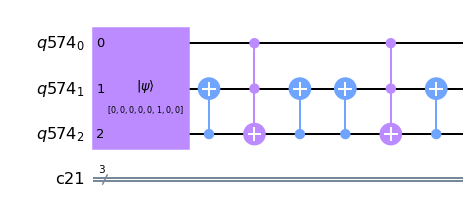

In [198]:
qc.draw();

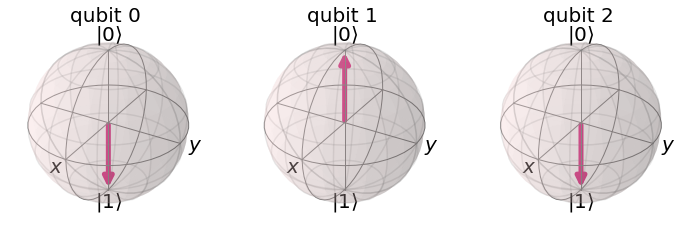

In [200]:
visualization.plot_bloch_multivector(execute(qc, backend).result().get_statevector());